What is SVM?

SVM is short for support vector machine, is a machine learning model that constructs a hyperplane which has the largest distance to the nearest data points of any class.

What can we do by using SVM?

- Classification
- Regression
- Outliers detection

## Linear SVM

**Input:** $n$ points of the form:

$$
(\vec{x_1},y_1),\cdots,(\vec{x_n},y_n)
$$

where the $y_i$ is either 1 or -1, each indicating the class to which the point $\vec{x_i}$ belongs. Each $\vec{x_i}$ is a $p$-dimensional real vector.

**Output:** a hyperplane that has maximum margin that divides the group of points $\vec{x_i}$ for which $y_i = 1$ from the group of points for which $y_i = -1$.

Any hyperplane can be written as the set of points $\vec{x}$ satisfying

$$
\vec{\omega} \cdot \vec{x} - \vec{b} = 0
$$

where $\vec{\omega}$ is the normal vector to the hyperplane.

### Hard margin

If the training data is linearly separable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible.

![SVM margin](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/247px-SVM_margin.png)

These hyperplanes can be described by the equations

$\vec{\omega} \cdot \vec{x} - b = 1$ (anything on or above this boundary is of one class, with label 1)

and

$\vec{\omega} \cdot \vec{x} - b = -1$ (anything on or below this boundary is of one class, with label -1)

Geometrically, the distance between these two hyperplanes is $\frac{2}{\left\lVert\vec{\omega}\right\rVert}$, so to maximize the distance between the planes we want to minimize $\left\lVert\vec{\omega}\right\rVert$.

We also have to prevent data points from falling into the margin, we add the following constraint: for each $i$ either

$\vec\omega \cdot \vec x_i - b \geq 1,$ if $y_i = 1,$

or

$\vec\omega \cdot \vec x_i - b \leq 1,$ if $y_i = -1$

These constraints state that each data point must lie on the correct side of the margin.

Rewrite the constraints:

$y_i(\vec\omega \cdot \vec x_i - b) \geq 1, \forall 1\leq i \leq n$

We can put this together to get the optimization problem:

Minimize $\left\lVert\vec{\omega}\right\rVert$ subject to $y_i(\vec{\omega}\cdot\vec{x_i} - b) \geq 1$ for $i = 1,\cdots, n$

### Soft margin

For the cases in which the data are not linearly separable, we introduce the hinge loss function,

$\text{max}(0, 1 - y_i(\vec{\omega}\cdot\vec{x_i} - b))$

We finally wish to minimize

$[\, \frac{1}{n}\sum_{i=1}^{n}\text{max}(0, 1 - y_i(\vec{\omega}\cdot\vec{x_i} - b))]\, + \lambda\lVert\omega\rVert^2$

In [2]:
import pandas as pd

df = pd.read_csv('/Users/lqdu/data/iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop(['Id'], axis=1, inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
df.drop(df[df['Species'] == 'Iris-virginica'].index, inplace=True)

In [17]:
# Now we have only two classes
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

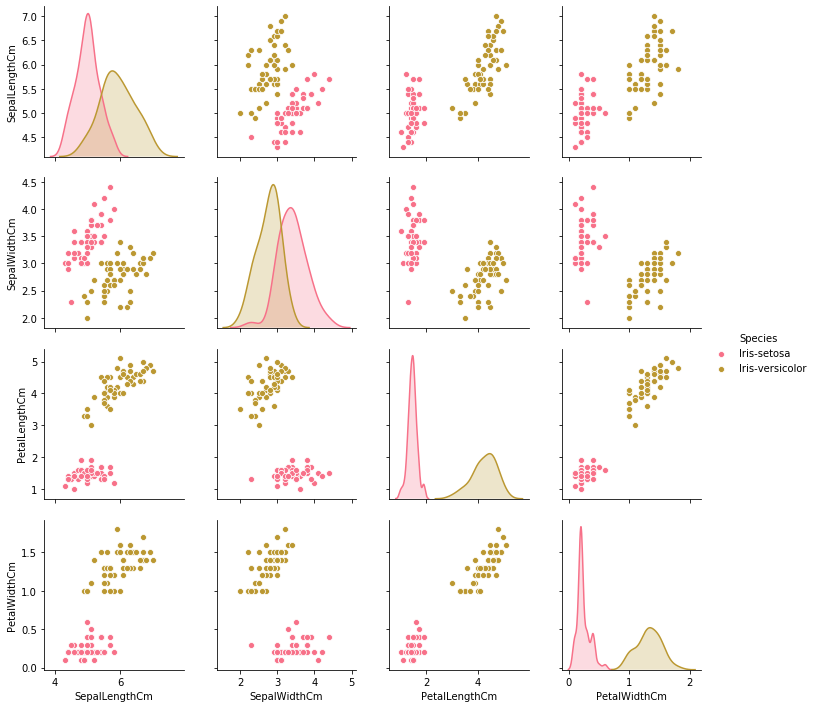

In [18]:
sns.pairplot(df, hue='Species')
plt.show()

In [19]:
# We choose two features to make it simple
df.drop(['SepalWidthCm', 'PetalWidthCm'], axis=1, inplace=True)

In [20]:
df.head()

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


In [21]:
# Encode target variable
df.replace(['Iris-setosa', 'Iris-versicolor'], [-1, 1], inplace=True)

In [22]:
df.head()

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,-1
1,4.9,1.4,-1
2,4.7,1.3,-1
3,4.6,1.5,-1
4,5.0,1.4,-1


In [23]:
Y = df['Species']
X = df.drop(['Species'], axis=1)

In [26]:
Y.shape

(100,)

In [27]:
X.shape

(100, 2)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [37]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (90, 2)
Shape of X_test: (10, 2)


In [34]:
print('shape of Y_train:', Y_train.shape)
print('shape of Y_test', Y_test.shape)

shape of Y_train: (90,)
shape of Y_test (10,)


In [40]:
w = np.zeros((2, 1))
lr = 0.0001

In [57]:
X_train = np.array(X_train)
y_train = np.array(Y_train).reshape((90, 1))
y_test = np.array(Y_test)

In [47]:
for i in range(1, 10000):
    y = np.dot(X_train, w)
    prod = y_train * y
    for ix, val in enumerate(prod):
        if val[0] >= 1:
            cost = 0
            w = w - lr * (2 * 1/(ix + 1) * w)
        else:
            cost = 1 - val[0]
            w = w + lr * (X_train[ix, :].reshape((2, 1)) * y_train[ix] - 2 * 1/(ix + 1) * w)


In [48]:
print(w)

[[-0.54259785]
 [ 1.06345473]]


In [68]:
preds = np.dot(X_test, w).flatten()

In [74]:
preds = [1 if p >= 1 else -1 for p in preds]

In [76]:
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))

Accuracy Score: 1.0


In [52]:
from sklearn.svm import SVC

In [53]:
clf = SVC()
print(clf)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [54]:
# Fit the model
clf.fit(X_train, y_train)

/Users/lqdu/miniconda3/envs/mlenv/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
y_pred = clf.predict(X_test)

In [62]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 1.0
